##  Neural Networks

In this notebook (the first on a series of Neural Networks) we will go over the basics of Neural Networks (NN), it is required some knowledge of machine learning, calculus, optimization. However, you can always learn what you need on the way.

As many other Machine Learning algorithms, NNs has been around for about 50 years. One of the main advantages is the ability to capture non-linear and high complex behavior. The huge number of coefficients required for training were a disadvantage for NNs in the 1990s Advances in computational resources in the recent years has favor these required trainig of parameter. Neural networks are very popular in Deep Learning and Computational Intelligence.

We will explore a binary classification problem. A brief overview:
 -  Generating synthetic data, and getting real data
 -  Description of Neural Networks (algorithm and mathematical construction)

### Requirements

In [1]:

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
import sklearn# to generate initial synhtetic data
from sklearn.datasets import make_moons

# Display plots in notebook 
%matplotlib inline
# Define plot's default figure size
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)


## Description of the data

### Reading and visualizing synthetic data

Nest we will consder two trainig sets. The first data set (synthetic) is created using **sklearn**

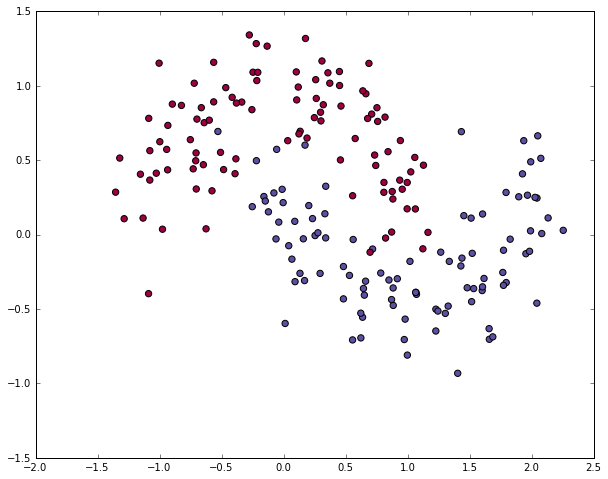

In [2]:
np.random.seed(0)
Xs,ys=sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(Xs[:,0],Xs[:,1],s=40,c=ys,cmap=plt.cm.Spectral)

### Reading and exploring real data (German credit)

**Analysis of German Credit Data** The following data was downloaded from __[German Credit Data](https://onlinecourses.science.psu.edu/stat857/node/215)__

This can be used on loan applications (base on profile) to determine if the pplicant is likely to repay the loan or not.

In [3]:
train = pd.read_csv("~/anaconda3/bin/GermanCreditData/Training50.csv")
train.head()

,Unnamed: 0,Creditability,Account.Balance,Duration.of.Credit..month.,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.cent,...,Duration.in.Current.address,Most.valuable.available.asset,Age..years.,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker
0,497,1,3,6,2,3,2108,1,3,2,...,2,1,29,2,1,1,1,1,1,1
1,756,0,1,15,1,4,950,1,4,4,...,3,3,33,2,1,2,1,2,1,1
2,580,0,1,42,2,3,7174,4,3,4,...,3,3,30,2,2,1,1,1,2,1
3,833,0,3,36,3,4,7980,4,1,4,...,4,3,27,2,1,2,1,1,2,1
4,602,1,3,24,3,2,2028,1,3,2,...,2,2,30,2,2,2,1,1,1,1


Here we display the possible factors involved in the decision of good/bad creditability

In [4]:

list(train)
#type(train['Creditabillity'])

['Unnamed: 0',
 'Creditability',
 'Account.Balance',
 'Duration.of.Credit..month.',
 'Payment.Status.of.Previous.Credit',
 'Purpose',
 'Credit.Amount',
 'Value.Savings.Stocks',
 'Length.of.current.employment',
 'Instalment.per.cent',
 'Sex...Marital.Status',
 'Guarantors',
 'Duration.in.Current.address',
 'Most.valuable.available.asset',
 'Age..years.',
 'Concurrent.Credits',
 'Type.of.apartment',
 'No.of.Credits.at.this.Bank',
 'Occupation',
 'No.of.dependents',
 'Telephone',
 'Foreign.Worker']

In [5]:
X, y =np.array( [np.array(train.ix[:,3]),np.array(train.ix[:,6])]),   np.array(train.ix[:,1])


In [6]:
type(X)

numpy.ndarray

In [7]:
X.shape

(2, 500)

In [8]:
X=X.transpose()
X.shape

(500, 2)

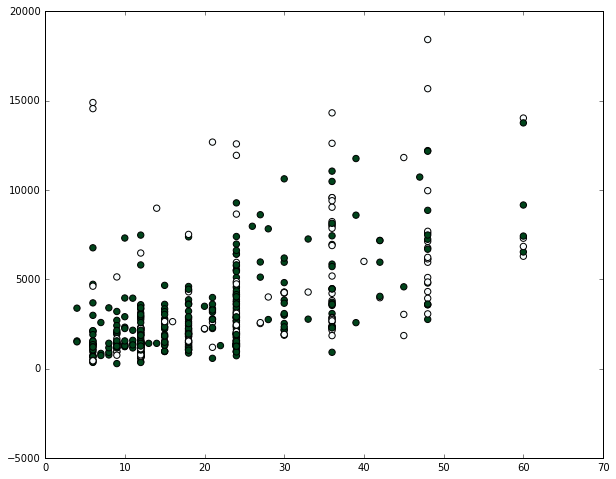

In [9]:

#Let's plot the dataset and see how it is
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.BuGn)


## Introdcution to MLP

Neural Networks are based on the idea of biological neorons. The neurons or processors are connected by weighted (like the weights of a linear regression model) links to pass the signal between neurons. Here we will focus in the so called Multi-Layer Perceptron **MLP** . This is a supervised learning algorithm, multilayer feddforward network that decide if a given input (vector) belongs to a class or not

<img src="https://www.researchgate.net/profile/Svetlana_Ibric2/publication/230735806/figure/fig1/AS:213418930905088@1427894446823/Schematic-drawing-of-multilayer-perceptron-neural-networks-16.png" alt="Alt text that describes the graphic" title="Title text" />



Locally, the structure of the nodes looks the same. That is, we have input values that describe the number of features and is called the **input layer**. These inputs are passed to a hiden layer as a weighted sum (adding the contributions of each input) to generate output values, know as the **output layer**.

<img src="https://cdn.hackaday.io/images/5320591480878696385.png" alt="Alt text that describes the graphic" title="Title text" />


The main idea is called Forward Propagation and can be described in three steps
- Start the input layer and propagate the information through the network according to the randomly initialized weights to generate an output
- Based on this output, we calculate the error we want to minimize (Resdidual Sum of Squares)
- Backpropagate the error, compute derivatives (neurons with respect the weights) and update model (weigths)

### Input layer

The i-th activation unit in the l-th layer is $a_i^{(l)}$, and the activation units $a_0^{(1)},a_0^{(2)}$ are the bias units, which we set equal to one. We write in vetor notation
$$a^{(1)}=[a_0^{(1)},a_2^{(1)},..,a_m^{1}]^{T}=[1,x_1^{(i)},...,x_m^{(i)}]^T$$
where $X_j^{(i)}$ represents the j-th feature of the i-th sample


### Coefficients (Weights)

The noatation commonly used (mainly due to chain rule in math derivations) to denote weights is $w_{j,k}^{(l)}$, representing the connection between the k-th unit in the layer $l$ to the j-th unit in layer l+1. We initialize this randomly and they are updated during the execution using **gradient descent**

In [10]:

import random
random.seed(0)

# calculate a random number where:  a <= rand < b
def rand(a, b):
    return (b-a)*random.random() + a



# Make a matrix 
def makeMatrix(I, J, fill=0.0):
    return np.zeros([I,J])




Then we define the activation function and its derivative

In [11]:
def sigmoid(x):
    #return math.tanh(x)
    return 1/(1+np.exp(-x))


# derivative of our sigmoid 
def dsigmoid(y):
    return y - y**2

The error of neuron $j$ in layer $l$ is
$$\delta_j^l=\frac{\partial C}{\partial z_j^l}$$ 
Where $C$ represents the cost function
$$C=\frac{1}{2}\sum_j(y_j-a_j^L)^2$$
In the otput layer, the component of $\delta_j^L$ are writen like
$$\delta_j^l=\frac{\partial C}{\partial a_j^L}\sigma'(z_j^L).$$ 
Here $\frac{\partial C}{\partial a_j^L}=(a_j^L-Y_j)$ measures how fast the cost function changes as a function of the j-th output activation, the second function $\sigma'(z_j^L)$ measures the rate of change of the activation function with respect the j-th output

Now we genarate a class called ANN whose input values are (number of inputs, hidden layers, number of outputs)

In [12]:
class ANN:
    def __init__(self, ni, nh, no):
        # number of input, hidden layers, and output nodes
        self.ni = ni + 1 # +1 for bias node
        self.nh = nh
        self.no = no

        # activations for nodes
        self.ai = [1.0]*self.ni
        self.ah = [1.0]*self.nh
        self.ao = [1.0]*self.no
        
        # create weights
        self.wi = makeMatrix(self.ni, self.nh)
        self.wo = makeMatrix(self.nh, self.no)
        
        # set them to random vaules
        for i in range(self.ni):
            for j in range(self.nh):
                self.wi[i][j] = rand(-0.2, 0.2)
        for j in range(self.nh):
            for k in range(self.no):
                self.wo[j][k] = rand(-2.0, 2.0)

        # last change in weights for momentum   
        self.ci = makeMatrix(self.ni, self.nh)
        self.co = makeMatrix(self.nh, self.no)
        

    def backPropagate(self, targets, N, M):
        
        if len(targets) != self.no:
            print(targets)
            raise ValueError('wrong number of target values')

        # calculate error terms for output
        output_deltas = np.zeros(self.no)
        for k in range(self.no):
            error = targets[k]-self.ao[k]
            output_deltas[k] = dsigmoid(self.ao[k]) * error

        # calculate error terms for hidden
        hidden_deltas = np.zeros(self.nh)
        for j in range(self.nh):
            error = 0.0
            for k in range(self.no):
                error += output_deltas[k]*self.wo[j][k]
            hidden_deltas[j] = dsigmoid(self.ah[j]) * error

        # update output weights with gradient descent
        for j in range(self.nh):
            for k in range(self.no):
                change = output_deltas[k] * self.ah[j]
                self.wo[j][k] += N*change + M*self.co[j][k]
                self.co[j][k] = change

        # update input weights with gradient descent
        for i in range(self.ni):
            for j in range(self.nh):
                change = hidden_deltas[j]*self.ai[i]
                self.wi[i][j] += N*change + M*self.ci[i][j]
                self.ci[i][j] = change

        # calculate residual sum of squares
        error = 0.0
        for k in range(len(targets)):
            error += 0.5*(targets[k]-self.ao[k])**2
        return error


    def test(self, patterns):
        self.predict = np.empty([len(patterns), self.no])
        for i, p in enumerate(patterns):
            self.predict[i] = self.activate(p)
            #self.predict[i] = self.activate(p[0])
            
    def activate(self, inputs):
        
        if len(inputs) != self.ni-1:
            print(inputs)
            raise ValueError('wrong number of inputs')

        # input activations
        for i in range(self.ni-1):
            self.ai[i] = inputs[i]

        # hidden activations
        for j in range(self.nh):
            sum_h = 0.0
            for i in range(self.ni):
                sum_h += self.ai[i] * self.wi[i][j]
            self.ah[j] = sigmoid(sum_h)

        # output activations
        for k in range(self.no):
            sum_o = 0.0
            for j in range(self.nh):
                sum_o += self.ah[j] * self.wo[j][k]
            self.ao[k] = sigmoid(sum_o)

        return self.ao[:]
    

    def train(self, patterns, iterations=1000, N=0.5, M=0.1):
        # N: learning rate
        # M: momentum factor
        patterns = list(patterns)
        for i in range(iterations):
            error = 0.0
            for p in patterns:
                inputs = p[0]
                targets = p[1]
                self.activate(inputs)
                error += self.backPropagate([targets], N, M)
            if i % 5 == 0:
                print('error in interation %d : %-.5f' % (i,error))
            print('Final training error: %-.5f' % error)



### Then we create a network with two inputs, one hidden, and one output nodes

In [19]:

ann211 = ANN(2, 1, 1)

%timeit -n 1 -r 1 ann211.train(zip(Xs,ys), iterations=2)

error in interation 0 : 24.30680
Final training error: 24.30680
Final training error: 21.57675
11.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [20]:
%timeit -n 1 -r 1 ann211.test(Xs)


prediction = pd.DataFrame(data=np.array([ys, np.ravel(ann211.predict)]).T, 
                          columns=["actual", "prediction"])
prediction.head()



2.24 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


,actual,prediction
0,0.0,0.393680
1,1.0,0.491999
2,1.0,0.302732
3,0.0,0.262395
4,1.0,0.488788


In [21]:
np.min(prediction.prediction)

0.18997789612008414

In [22]:
from math import exp, expm1
import math

# Helper function to plot a decision boundary.
# This generates the contour plot to show the decision boundary visually
def plot_decision_boundary(nn_model):
    # Set min and max values and give it some padding
    x_min, x_max = Xs[:, 0].min() - .5, Xs[:, 0].max() + .5
    y_min, y_max = Xs[:, 1].min() - .5, Xs[:, 1].max() + .5
    print(x_min,x_max)
    print(y_min,y_max)

    h = 0.1
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    nn_model.test(np.c_[xx.ravel(), yy.ravel()])
    Z = nn_model.predict
    Z[Z>=0.5] = 1
    Z[Z<0.5] = 0
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(Xs[:, 0], Xs[:, 1], s=40,  c=ys, cmap=plt.cm.BuGn)



-1.85462041177 2.75536302013
-1.43206382316 1.84161044582


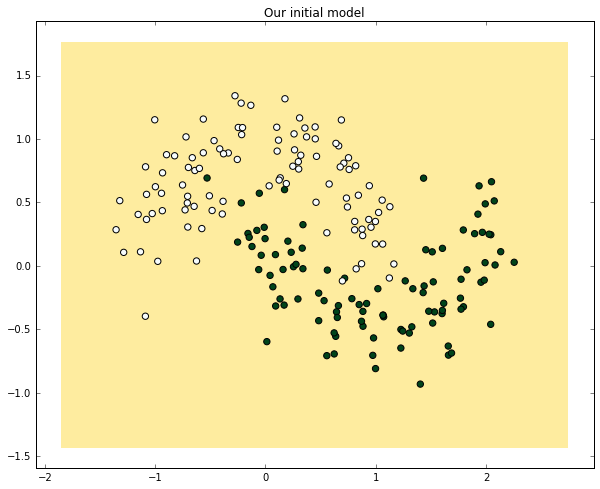

In [23]:
plot_decision_boundary(ann211)
plt.title("Our initial model")